# LLMs For The Rescue - Generating New Datasets

Moderate evaluation results of existing tools for predicting the Big Five personality traits in texts using well-known datasets (Essays & MyPersonality), in conjunction with the emergence of LLMs like GPT, Bard, and Bing-Co-Pilot, motivated us to experiment with employing LLMs to generate textual content that highly correlates (or negatively correlates) with each personality trait.

**Here are the steps we took to generate the dataset:**

1. Gathered detailed definitions for each Big Five personality trait from the web and from academic resources.
2. Manually concatenated the different definitions in a readable manner.
3. Manually write a main prompt that starts with the trait's definition (2), and ends with requesting the LLM model to generate 10 paragraphs that demonstrate high score of the trait (doing the same for low trait score).
4. Iteratively refine prompts, and modify the requests to generate texts that are more unique, random, longer, avoid repetition and write as different characters.

The above steps were employed on each of the popular free-to-use LLMs: **Open-AI's Chat-GPT3.5**, **Google's Bard (Gemini)** and **Microsoft's Bing-CoPilot**.


#### Helper function to filter out too-similar texts


In [55]:
from sentence_transformers import SentenceTransformer, util

SIMILARITY_THRESHOLD = 0.9
# MODEL = "intfloat/e5-large-v2"
MODEL = "all-MiniLM-L6-v2"


def get_unique_paragraphs(texts: list[str], label: str):
    model = SentenceTransformer(MODEL)
    embeddings = model.encode(texts, convert_to_tensor=True)
    similarities = util.pytorch_cos_sim(embeddings, embeddings)
    unique_paragraphs = []
    unique_embeddings = []
    for i in range(len(texts)):
        is_dissimilar = all(
            similarity < SIMILARITY_THRESHOLD
            for j, similarity in enumerate(similarities[i])
            if j != i
        )
        if is_dissimilar:
            unique_paragraphs.append(texts[i])
            unique_embeddings.append((embeddings[i], label))

    print(f"{len(unique_paragraphs)}/{len(texts)} Unique Paragraphs.")
    if not unique_paragraphs:
        print("No unique paragraphs found.")
    return unique_embeddings, unique_paragraphs

#### Helper function to persist data in sheet


In [54]:
import openpyxl


def overwrite_sheet(file_path: str, sheet_name: str, texts: list[str]):
    # workbook = openpyxl.load_workbook(file_path)
    # if sheet_name in workbook.sheetnames:
    #     workbook.remove(workbook[sheet_name])
    # new_sheet = workbook.create_sheet(title=sheet_name)
    # for i, paragraph in enumerate(texts):
    #     new_sheet.cell(row=i + 1, column=1, value=paragraph)
    # workbook.save(file_path)
    pass

### GPT-3.5 Generated Dataset


#### Read Data From File


In [56]:
import pandas as pd

llm_dataset_file_path = "analysis/llm-dataset-generation/traits-definitions.xlsx"

df = pd.read_excel(llm_dataset_file_path, sheet_name="High-OPN-GPT3.5")
high_openness_texts = df.iloc[:, 0].tolist()

df = pd.read_excel(llm_dataset_file_path, sheet_name="Low-OPN-GPT3.5")
low_openness_texts = df.iloc[:, 0].tolist()

#### Filter Out Similarities


In [57]:
(
    unique_high_openness_vectors_with_labels,
    unique_high_openness_paragraphs_gpt,
) = get_unique_paragraphs(high_openness_texts, label="HIGH_OPN")

overwrite_sheet(
    llm_dataset_file_path,
    f"High-OPN-GPT3.5-filtered-{SIMILARITY_THRESHOLD}",
    unique_high_openness_paragraphs_gpt,
)

142/149 Unique Paragraphs.


In [58]:
(
    unique_low_openness_vectors_with_labels,
    unique_low_openness_paragraphs_gpt,
) = get_unique_paragraphs(low_openness_texts, label="LOW_OPN")

overwrite_sheet(
    llm_dataset_file_path,
    f"Low-OPN-GPT3.5-filtered-{SIMILARITY_THRESHOLD}",
    unique_low_openness_paragraphs_gpt,
)

140/215 Unique Paragraphs.


#### Word Count Statistics


In [6]:
high_opn_word_count = [
    len(paragraph.split()) for paragraph in unique_high_openness_paragraphs_gpt
]
low_opn_word_count = [
    len(paragraph.split()) for paragraph in unique_low_openness_paragraphs_gpt
]
high_counts_df = pd.DataFrame({"High OPN Word Count": high_opn_word_count})
low_counts_df = pd.DataFrame({"Low OPN Word Count": low_opn_word_count})
print("Word Counts with similarity threshold == 0.9")
print(high_counts_df.describe())
print(low_counts_df.describe())

Word Counts with similarity threshold == 0.9
       High OPN Word Count
count            89.000000
mean             62.764045
std               9.752648
min              40.000000
25%              56.000000
50%              64.000000
75%              69.000000
max              87.000000
       Low OPN Word Count
count           73.000000
mean            58.890411
std              7.066277
min             43.000000
25%             55.000000
50%             59.000000
75%             63.000000
max             82.000000


In [6]:
high_opn_word_count = [
    len(paragraph.split()) for paragraph in unique_high_openness_paragraphs_gpt
]
low_opn_word_count = [
    len(paragraph.split()) for paragraph in unique_low_openness_paragraphs_gpt
]
high_counts_df = pd.DataFrame({"High OPN Word Count": high_opn_word_count})
low_counts_df = pd.DataFrame({"Low OPN Word Count": low_opn_word_count})
print("Word Counts with similarity threshold == 0.95")
print(high_counts_df.describe())
print(low_counts_df.describe())

Word Counts with similarity threshold == 0.95
       High OPN Word Count
count           143.000000
mean             65.524476
std              10.643938
min              40.000000
25%              59.500000
50%              65.000000
75%              72.000000
max             105.000000
       Low OPN Word Count
count          129.000000
mean            60.302326
std             12.095715
min             39.000000
25%             53.000000
50%             59.000000
75%             65.000000
max            100.000000


### Bard Generated Dataset


#### Read Data From File


In [59]:
import pandas as pd

llm_dataset_file_path = "analysis/llm-dataset-generation/traits-definitions.xlsx"

df = pd.read_excel(llm_dataset_file_path, sheet_name="High-Openness-Bard")
high_openness_texts_bard = df.iloc[:, 0].tolist()

df = pd.read_excel(llm_dataset_file_path, sheet_name="Low-Openness-Bard")
low_openness_texts_bard = df.iloc[:, 0].tolist()

#### Filter Out Similarities


In [60]:
(
    unique_high_openness_bard_vectors_with_labels,
    unique_high_openness_paragraphs_bard,
) = get_unique_paragraphs(high_openness_texts_bard, label="HIGH_OPN")


(
    unique_low_openness_bard_vectors_with_labels,
    unique_low_openness_paragraphs_bard,
) = get_unique_paragraphs(low_openness_texts_bard, label="LOW_OPN")

overwrite_sheet(
    llm_dataset_file_path,
    f"High-Openness-Bard-filtered-{SIMILARITY_THRESHOLD}",
    unique_high_openness_paragraphs_bard,
)
overwrite_sheet(
    llm_dataset_file_path,
    f"Low-Openness-Bard-filtered-{SIMILARITY_THRESHOLD}",
    unique_low_openness_paragraphs_bard,
)

55/95 Unique Paragraphs.
93/93 Unique Paragraphs.


#### Word Count Statistics


In [9]:
high_opn_word_count = [
    len(paragraph.split()) for paragraph in unique_high_openness_paragraphs_bard
]
low_opn_word_count = [
    len(paragraph.split()) for paragraph in unique_low_openness_paragraphs_bard
]
high_counts_df = pd.DataFrame({"High OPN Word Count": high_opn_word_count})
low_counts_df = pd.DataFrame({"Low OPN Word Count": low_opn_word_count})
print("Word Counts with similarity threshold == 0.95")
print(high_counts_df.describe())
print(low_counts_df.describe())

Word Counts with similarity threshold == 0.95
       High OPN Word Count
count            51.000000
mean             60.431373
std              11.720503
min              41.000000
25%              53.000000
50%              60.000000
75%              67.500000
max              98.000000
       Low OPN Word Count
count           93.000000
mean            64.591398
std             13.755818
min             40.000000
25%             56.000000
50%             63.000000
75%             68.000000
max            102.000000


# Logistic Regression


### GPT 3.5 [98%]

When the similarity threshold was set to 0.9, the accuracy score was 97%. <br>
When changed to 0.95, the accuracy score rose to 98%.


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

vectors_with_labels = (
    unique_high_openness_vectors_with_labels + unique_low_openness_vectors_with_labels
)

train_data, test_data = train_test_split(vectors_with_labels, test_size=0.2)
train_vectors = [t[0] for t in train_data]
train_labels = [t[1] for t in train_data]
test_vectors = [t[0] for t in test_data]
test_labels = [t[1] for t in test_data]


gpt_only_model = LogisticRegression(random_state=0).fit(train_vectors, train_labels)
print(gpt_only_model.score(test_vectors, test_labels))

0.9649122807017544


### Bard [82.7%]

When the similarity threshold was set to 0.9 the accuracy score was between 60%-85%. <br>
When changed to 0.95, the accuracy score reduced to 82.7%


In [99]:
vectors_with_labels = (
    unique_high_openness_bard_vectors_with_labels
    + unique_low_openness_bard_vectors_with_labels
)

train_data, test_data = train_test_split(vectors_with_labels, test_size=0.2)
train_vectors = [t[0] for t in train_data]
train_labels = [t[1] for t in train_data]
test_vectors = [t[0] for t in test_data]
test_labels = [t[1] for t in test_data]


bard_only_model = LogisticRegression(
    random_state=0).fit(train_vectors, train_labels)
print(bard_only_model.score(test_vectors, test_labels))

0.7857142857142857


### Bard + GPT 3.5 [92%]

When the similarity threshold was set to 0.9 the accuracy score was between 90%-98%. <br>
When changed to 0.95, the accuracy score reduced to 94% - 98%


In [102]:
vectors_with_labels = (
    unique_high_openness_bard_vectors_with_labels
    + unique_high_openness_vectors_with_labels
    + unique_low_openness_bard_vectors_with_labels
    + unique_low_openness_vectors_with_labels
)

train_data, test_data = train_test_split(vectors_with_labels, test_size=0.2)
train_vectors = [t[0] for t in train_data]
train_labels = [t[1] for t in train_data]
test_vectors = [t[0] for t in test_data]
test_labels = [t[1] for t in test_data]


gpt_and_bard_model = LogisticRegression(random_state=0).fit(train_vectors, train_labels)
print(gpt_and_bard_model.score(test_vectors, test_labels))

0.9508196721311475


### Accuracy Cross Models


#### GPT model with Bard data

Similarity threshold == 0.9 -> accuracy 66% <br>
Similarity threshold == 0.95 -> accuracy 71%


In [40]:
vectors_with_labels = (
    unique_high_openness_bard_vectors_with_labels
    + unique_low_openness_bard_vectors_with_labels
)

vectors = [t[0] for t in vectors_with_labels]
labels = [t[1] for t in vectors_with_labels]
gpt_only_model.score(vectors, labels)

0.7152777777777778

#### Bard model with GPT data

Similarity threshold == 0.9 -> accuracy 50% <br>
Similarity threshold == 0.95 -> accuracy 47.8%


In [44]:
vectors_with_labels = (
    unique_high_openness_vectors_with_labels + unique_low_openness_vectors_with_labels
)

vectors = [t[0] for t in vectors_with_labels]
labels = [t[1] for t in vectors_with_labels]
bard_only_model.score(vectors, labels)

0.47794117647058826

### Small Verification Experiment

The paragraphs above were generated by ChatGPT3.5, as texts written by writters with low openness. <br>
This is done as part of a small experiment to verify that Bard's generated texts repeated paragraph-patterns too often, which we estimate caused the model trained on Bard's data to overfit these patterns. <br>
To verify this, we simply created a small set of 10 paragraphs, written by writters with low openness. To this set we will append the repeating prefix: "aren't just". <br>
Then, we'll ask the model trained on Bard's data to classify: high vs low openness. We assume that the prefix addition will make it mistake and predict LOW, wrongly.


In [32]:
# paragraphs that were generated by "writters with low openness" by ChatGPT3.5
bard_verification_set = [
    "In the quiet simplicity of my daily routine, I find comfort and stability. The predictability of each day allows me to focus on the tasks at hand without the distractions of constant change. I appreciate the familiar patterns that guide my actions, providing a sense of order in a world that can often be chaotic.",
    "Change has always been a source of discomfort for me. Whether it's a new technology or a different way of doing things, I prefer the tried and true. Routines offer a sense of security, a sanctuary where I can navigate life with confidence. The unfamiliarity of change tends to stir a sense of unease within me.",
    "I've never been one to seek out exotic experiences or adventurous endeavors. The thought of traveling to distant lands and immersing myself in unfamiliar cultures doesn't hold the same allure as the comfort of my own home. I find solace in the familiar surroundings that reflect the stability I value.",
    "Abstract concepts and theoretical ideas often elude my grasp. I appreciate practicality and straightforward thinking. The complexities of abstract thought can feel overwhelming and unnecessary, as I prefer to focus on tangible and concrete solutions to problems that arise.",
    "Creativity has never been my strong suit. I find satisfaction in the execution of established methods rather than exploring innovative approaches. While others may revel in the realm of imagination, I am content with the proven and practical, steering clear of the unpredictable.",
    "Routine and predictability define my comfort zone. The thought of stepping into the unknown triggers a sense of anxiety. I thrive in environments where expectations are clear, and deviations from the norm are kept to a minimum. Stability is my compass in the journey of life.",
    "Immersing myself in diverse interests has never been a priority. I find contentment in the familiarity of a select few hobbies that resonate with my grounded nature. The idea of cultivating an extensive range of interests seems unnecessary when my existing pursuits bring me fulfillment.",
    "While others may relish the excitement of tackling new challenges, I find satisfaction in mastering the familiar. The prospect of constant change and the need for adaptation seem daunting, and I prefer the steadiness of a well-trodden path.",
    "The prospect of embracing unconventional ideas or unconventional approaches leaves me skeptical. I hold a preference for traditions that have stood the test of time, finding comfort in the wisdom of tried-and-true practices. Novelty may have its appeal, but stability remains my anchor.",
    "In a world that often celebrates the open-minded and adventurous, I find solace in the reliability of closedness. The known provides a sanctuary where I can navigate life with confidence, free from the uncertainties that accompany a more open approach.",
]

In [35]:
# MODEL = "intfloat/e5-large-v2"
MODEL = "all-MiniLM-L6-v2"
model = SentenceTransformer(MODEL)
embeddings = model.encode(bard_verification_set, convert_to_tensor=True)
print("Score for predicting LOW_OPN by Bard's model - on LOW_OPN texts by GPT: ")
bard_only_model.score(embeddings, ["LOW_OPN" for i in range(10)])

Score for predicting LOW_OPN by Bard's model - on LOW_OPN texts by GPT: 


1.0

In [36]:
modified_texts = ["Sticks aren't just wood; " + p for p in bard_verification_set]
modified_embeddings = model.encode(modified_texts, convert_to_tensor=True)
print(
    "Score for predicting LOW_OPN by Bard's model - on LOW_OPN texts by GPT with Bard's repeated prefix: "
)
bard_only_model.score(modified_embeddings, ["LOW_OPN" for i in range(10)])

Score for predicting LOW_OPN by Bard's model - on LOW_OPN texts by GPT with Bard's repeated prefix: 


1.0

### Apply Magic Sauce [Highs: 98%, Lows 11%]


In [106]:
import requests
import json
from retry import retry

api_url = "https://applymagicsauce.com/api/predictions/text"
api_token = ""
essays_data_csv_file_path = "./data/myPersonality.csv"
result_file_path = "./analysis/tools-baseline/tool-3-baseline-myPersonality.csv"
headers = {
    "Content-Type": "text/plain",
    "Authorization": f"Bearer {api_token}",
}


@retry(
    (
        requests.exceptions.RequestException,
        requests.exceptions.Timeout,
        requests.exceptions.HTTPError,
        requests.exceptions.ConnectionError,
        requests.exceptions.JSONDecodeError,
    ),
    delay=5,
    tries=3,
)
def throttle_post_request(url, payload, headers=headers):
    response = requests.post(url, data=payload, headers=headers)
    if response.status_code != 200:
        raise requests.exceptions.HTTPError(
            f"POST request failed. Status code: {response.status_code}."
        )
    return response.json()


predictions_fields = [
    "BIG5_Openness",
    "BIG5_Conscientiousness",
    "BIG5_Extraversion",
    "BIG5_Agreeableness",
    "BIG5_Neuroticism",
    "Female",
    "Age",
]


def get_apply_magic_sauce_openness_predictions(texts: list[str]):
    results = []
    for text in texts:
        payload = json.dumps(text)
        api_data = throttle_post_request(api_url, payload)
        for p in api_data.get("predictions"):
            if p.get("trait") == "BIG5_Openness":
                print(p.get("value"))
                results.append(p.get("value"))
    return results

In [18]:
# Apply Magic Sauce API is muted to avoid running again

# print("Iterating over HIGH openness results")
# get_apply_magic_sauce_openness_predictions(unique_high_openness_paragraphs_gpt + unique_high_openness_paragraphs_bard)

# print("Iterating over LOW openness results")
# get_apply_magic_sauce_openness_predictions(unique_low_openness_paragraphs_gpt + unique_low_openness_paragraphs_bard)

In [166]:
# ApplyMagicSauce Openness predictions for high and low openness paragraphs are stored here to avoid using the API again.
applymagicsauce_openness_predictions_high = [
    0.9033,
    0.7737,
    0.9834,
    0.7617,
    0.877,
    0.8967,
    0.7531,
    0.9834,
    0.9834,
    0.9031999999999999,
    0.7741,
    0.9035,
    0.9834,
    0.8326,
    0.7922,
    0.9520000000000001,
    0.9652,
    0.8901,
    0.9834,
    0.7475,
    0.9586,
    0.9834,
    0.9834,
    0.9035,
    0.7763,
    0.7865000000000001,
    0.9661,
    0.7472,
    0.9834,
    0.9834,
    0.9033,
    0.7763,
    0.8859999999999999,
    0.8969,
    0.7964,
    0.9834,
    0.7865000000000001,
    0.9834,
    0.9834,
    0.9,
    0.7966,
    0.9652,
    0.7070000000000001,
    0.8773000000000001,
    0.6548,
    0.9834,
    0.9834,
    0.7741,
    0.7966,
    0.8773000000000001,
    0.9834,
    0.8765000000000001,
    0.9834,
    0.9834,
    0.9834,
    0.7966,
    0.8686,
    0.9834,
    0.9834,
    0.8859999999999999,
    0.7964,
    0.8773000000000001,
    0.9834,
    0.8812000000000001,
    0.8852,
    0.9616,
    0.8326,
    0.9834,
    0.7763,
    0.8687,
    0.9834,
    0.3532,
    0.7763,
    0.8724,
    0.9834,
    0.9519,
    0.9545999999999999,
    0.9651000000000001,
    0.8686,
    0.7617,
    0.6388,
    0.6313,
    0.7617,
    0.9834,
    0.9616,
    0.8948999999999999,
    0.7875,
    0.8812000000000001,
    0.7737,
    0.769,
    0.9519,
    0.9834,
    0.9834,
    0.6188,
    0.8859999999999999,
    0.747,
    0.6252,
    0.9035,
    0.7865000000000001,
    0.5003,
    0.6673,
    0.7966,
    0.7468,
    0.9616,
    0.6401,
    0.8686,
    0.9834,
    0.9637,
    0.7875,
    0.7875,
    0.9569,
    0.6526000000000001,
    0.7879,
    0.9834,
    0.6401,
    0.8967,
    0.9521999999999999,
    0.9620000000000001,
    0.7070000000000001,
    0.8859999999999999,
    0.6546,
    0.6256,
    0.8812000000000001,
    0.8948999999999999,
    0.8686,
    0.6313,
    0.6401,
    0.8762000000000001,
    0.877,
    0.8901,
    0.7865000000000001,
    0.877,
    0.8859999999999999,
    0.8812000000000001,
    0.9834,
    0.9034,
    0.9601000000000001,
    0.5063,
    0.9035,
    0.8326,
    0.9577,
    0.8852,
    0.9834,
    0.965,
    0.9834,
    0.9834,
    0.7531,
    0.7815000000000001,
    0.8852,
    0.4917,
    0.8869,
    0.7070000000000001,
    0.9031999999999999,
    0.7865000000000001,
    0.7475,
    0.7737,
    0.4657,
    0.7070000000000001,
    0.8687,
    0.9834,
    0.7879,
    0.8859999999999999,
    0.7763,
    0.7617,
    0.9834,
    0.9834,
]
applymagicsauce_openness_predictions_low = [
    0.9834,
    0.7737,
    0.9,
    0.6667000000000001,
    0.9834,
    0.9620000000000001,
    0.8326,
    0.7868999999999999,
    0.9834,
    0.9834,
    0.7737,
    0.7753,
    0.5656,
    0.9661,
    0.9521999999999999,
    0.769,
    0.9834,
    0.8765000000000001,
    0.8948999999999999,
    0.6526000000000001,
    0.5656,
    0.9031999999999999,
    0.35979999999999995,
    0.6388,
    0.9834,
    0.6548,
    0.9,
    0.8687,
    0.9834,
    0.8326,
    0.9620000000000001,
    0.8869,
    0.747,
    0.8326,
    0.877,
    0.9278,
    0.6452,
    0.2484,
    0.3809,
    0.465,
    0.3812,
    0.6667000000000001,
    0.6374,
    0.6672,
    0.6606000000000001,
    0.7585,
    0.6503,
    0.7966,
    0.6667000000000001,
    0.6252,
    0.7815000000000001,
    0.7964,
    0.4917,
    0.9519,
    0.9601000000000001,
    0.9586,
    0.9519,
    0.47700000000000004,
    0.6401,
    0.7475,
    0.8948999999999999,
    0.6188,
    0.6503,
    0.6401,
    0.9834,
    0.22510000000000002,
    0.6246,
    0.6246,
    0.3436,
    0.8859999999999999,
    0.9834,
    0.8326,
    0.9834,
    0.9834,
    0.9637,
    0.9620000000000001,
    0.9834,
    0.9834,
    0.6313,
    0.9569,
    0.9834,
    0.9520000000000001,
    0.9620000000000001,
    0.9834,
    0.8967,
    0.9278,
    0.9834,
    0.9834,
    0.9834,
    0.8901,
    0.8773000000000001,
    0.9834,
    0.7753,
    0.7741,
    0.7468,
    0.8852,
    0.7472,
    0.6548,
    0.7472,
    0.8687,
    0.3356,
    0.3667,
    0.9569,
    0.22510000000000002,
    0.6252,
    0.9651000000000001,
    0.7753,
    0.14980000000000002,
    0.9652,
    0.6606000000000001,
    0.5058,
    0.7966,
    0.9601000000000001,
    0.6667000000000001,
    0.9031999999999999,
    0.9034,
    0.6401,
    0.7589,
    0.465,
    0.9834,
    0.7475,
    0.5125,
    0.6188,
    0.8812000000000001,
    0.6673,
    0.6673,
    0.7922,
    0.8812000000000001,
    0.6673,
    0.7737,
    0.6313,
    0.9652,
    0.7879,
    0.7966,
    0.7585,
    0.47950000000000004,
    0.7753,
    0.8686,
    0.6188,
    0.9834,
    0.47700000000000004,
    0.4929,
    0.7475,
    0.5656,
    0.5125,
    0.465,
    0.49439999999999995,
    0.7737,
    0.7868999999999999,
    0.9569,
    0.6313,
    0.9834,
    0.6673,
    0.8687,
    0.9623999999999999,
    0.6673,
    0.7865000000000001,
    0.7966,
    0.7737,
    0.8948999999999999,
    0.769,
    0.6246,
    0.7070000000000001,
    0.6526000000000001,
    0.7617,
    0.7966,
    0.8812000000000001,
    0.7868999999999999,
    0.7737,
    0.8687,
    0.6672,
    0.4914,
    0.7475,
    0.9521999999999999,
    0.4715,
    0.5003,
    0.6246,
    0.8969,
    0.7875,
    0.5058,
    0.6546,
    0.3667,
    0.6246,
    0.5125,
    0.4914,
    0.6401,
    0.6188,
    0.747,
    0.7964,
    0.6606000000000001,
    0.7468,
    0.7070000000000001,
    0.7468,
    0.8686,
]

In [167]:
applymagicsauce_openness_predictions_high_sum = []
for v in applymagicsauce_openness_predictions_high:
    if v >= 0.5:
        applymagicsauce_openness_predictions_high_sum.append(1)
print(
    f"ApplyMagicSauce High Labels Accuracy: {sum(applymagicsauce_openness_predictions_high_sum)/len(applymagicsauce_openness_predictions_high)}"
)

applymagicsauce_openness_predictions_low_sum = []
for v in applymagicsauce_openness_predictions_low:
    if v < 0.5:
        applymagicsauce_openness_predictions_low_sum.append(1)
print(
    f"ApplyMagicSauce Low Labels Accuracy: {sum(applymagicsauce_openness_predictions_low_sum)/len(applymagicsauce_openness_predictions_low)}"
)

ApplyMagicSauce High Labels Accuracy: 0.9819277108433735
ApplyMagicSauce Low Labels Accuracy: 0.11855670103092783


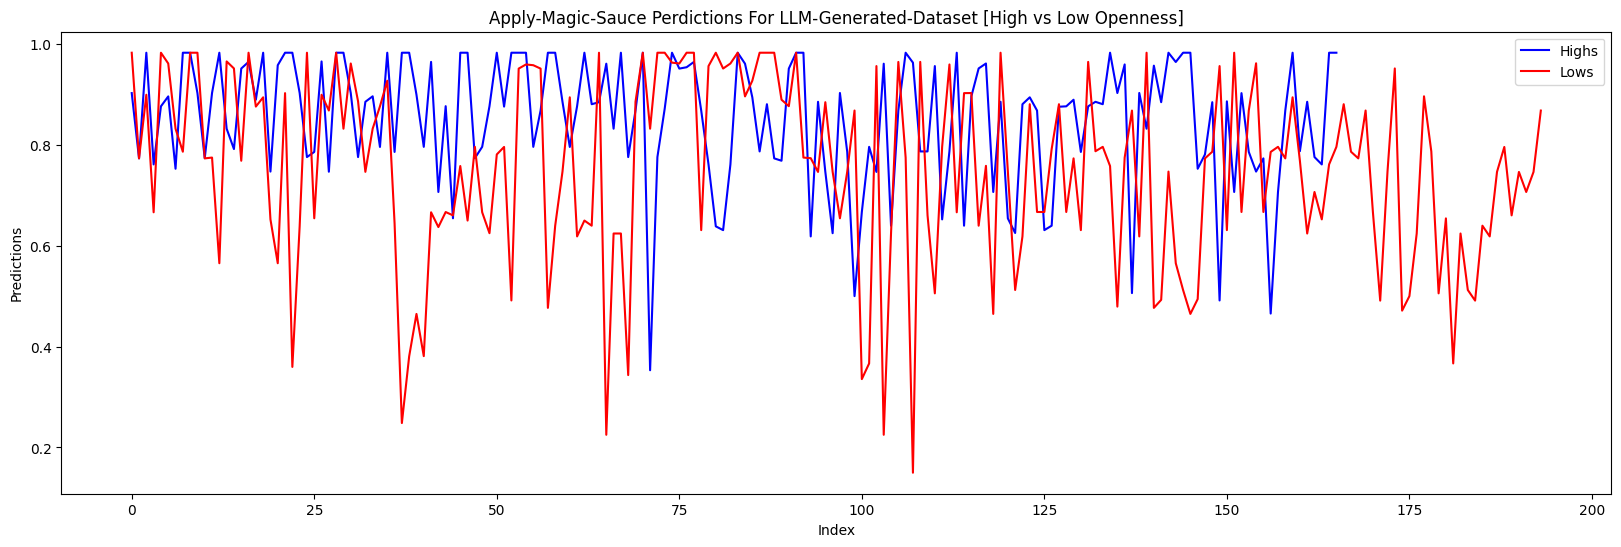

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
x_values = range(len(applymagicsauce_openness_predictions_high))
plt.plot(
    x_values, applymagicsauce_openness_predictions_high, label="Highs", color="blue"
)
x_values = range(len(applymagicsauce_openness_predictions_low))
plt.plot(x_values, applymagicsauce_openness_predictions_low,
         label="Lows", color="red")
plt.xlabel("Index")
plt.ylabel("Predictions")
plt.title(
    "Apply-Magic-Sauce Perdictions For LLM-Generated-Dataset [High vs Low Openness]"
)
plt.legend()
plt.show()

## Assess the models' performance against `essays` and `MyPersonality` datasets


#### Essays


**Scores:** <br>
**similarity threshold == 0.95:** <br>
Bard-Only Score: 0.4846029173419773 <br>
GPT-Only Score: 0.4959481361426256 <br>
Bard-And-GPT Score: 0.4874392220421394


In [53]:
import pandas as pd

MODEL = "intfloat/e5-large-v2"
# MODEL = "all-MiniLM-L6-v2"
model = SentenceTransformer(MODEL)
essays_df = pd.read_csv(
    "./data/essays.csv", usecols=["TEXT", "cOPN"], encoding="ISO-8859-1"
)
value_map = {"y": "HIGH_OPN", "n": "LOW_OPN"}
essays_df["cOPN"] = essays_df["cOPN"].map(value_map)
essays_embeddings = model.encode(essays_df["TEXT"], convert_to_tensor=True)

print("Bard-Only Score:", bard_only_model.score(essays_embeddings, essays_df["cOPN"]))
print("GPT-Only Score:", gpt_only_model.score(essays_embeddings, essays_df["cOPN"]))
print(
    "Bard-And-GPT Score:",
    gpt_and_bard_model.score(essays_embeddings, essays_df["cOPN"]),
)

Bard-Only Score: 0.4846029173419773
GPT-Only Score: 0.4959481361426256
Bard-And-GPT Score: 0.4874392220421394


#### MyPersonality concatenated

(all the statuses of the same auther are concatenated to a single long string)

**Scores:** <br>
**similarity threshold == 0.9:** <br>
Bard-Only Score: 0.296 <br>
GPT-Only Score: 0.584 <br>
Bard-And-GPT Score: 0.288 <br> <br>

**similarity threshold == 0.95:** <br>
Bard-Only Score: 0.296 <br>
GPT-Only Score: 0.484 <br>
Bard-And-GPT Score: 0.304


In [103]:
import pandas as pd

MODEL = "intfloat/e5-large-v2"
# MODEL = "all-MiniLM-L6-v2"
model = SentenceTransformer(MODEL)
myPersonality_df = pd.read_csv(
    "./data/myPersonality-concatenated.csv",
    usecols=["STATUS", "cOPN"],
    encoding="ISO-8859-1",
)
value_map = {"y": "HIGH_OPN", "n": "LOW_OPN"}
myPersonality_df["cOPN"] = myPersonality_df["cOPN"].map(value_map)
myPersonality_embeddings = model.encode(
    myPersonality_df["STATUS"], convert_to_tensor=True
)

print(
    "Bard-Only Score:",
    bard_only_model.score(myPersonality_embeddings, myPersonality_df["cOPN"]),
)
print(
    "GPT-Only Score:",
    gpt_only_model.score(myPersonality_embeddings, myPersonality_df["cOPN"]),
)
print(
    "Bard-And-GPT Score:",
    gpt_and_bard_model.score(myPersonality_embeddings, myPersonality_df["cOPN"]),
)

Bard-Only Score: 0.296
GPT-Only Score: 0.584
Bard-And-GPT Score: 0.288


#### MyPersonality

**Scores:** <br>
**similarity threshold == 0.90:** <br>
Bard-Only Score: 0.25683170313602904 <br>
GPT-Only Score: 0.6290208732479581 <br>
Bard-And-GPT Score: 0.34213976000806695 <br><br>
**similarity threshold == 0.95:** <br>
Bard-Only Score: 0.2571342139760008 <br>
GPT-Only Score: 0.5516789351618433 <br>
Bard-And-GPT Score: 0.37612181103156195


In [104]:
import pandas as pd

MODEL = "intfloat/e5-large-v2"
# MODEL = "all-MiniLM-L6-v2"
model = SentenceTransformer(MODEL)
myPersonality_df = pd.read_csv(
    "./data/myPersonality.csv", usecols=["STATUS", "cOPN"], encoding="ISO-8859-1"
)
value_map = {"y": "HIGH_OPN", "n": "LOW_OPN"}
myPersonality_df["cOPN"] = myPersonality_df["cOPN"].map(value_map)
myPersonality_embeddings = model.encode(
    myPersonality_df["STATUS"], convert_to_tensor=True
)

print(
    "Bard-Only Score:",
    bard_only_model.score(myPersonality_embeddings, myPersonality_df["cOPN"]),
)
print(
    "GPT-Only Score:",
    gpt_only_model.score(myPersonality_embeddings, myPersonality_df["cOPN"]),
)
print(
    "Bard-And-GPT Score:",
    gpt_and_bard_model.score(myPersonality_embeddings, myPersonality_df["cOPN"]),
)

Bard-Only Score: 0.25683170313602904
GPT-Only Score: 0.6290208732479581
Bard-And-GPT Score: 0.34213976000806695


get the accuracy scores
persist
test against bard's dataset
new scores for reddit dataset


# Persisting logistic regression users as pickles for future usage


In [64]:
import pickle


def persist_model(pickle_name: str, model_to_save: LogisticRegression):
    prefix = "mini_" if MODEL == "all-MiniLM-L6-v2" else ""
    with open(f"models/{prefix}{pickle_name}.pkl", "wb") as file:
        pickle.dump(model_to_save, file)


# persist_model("logistic_regression_gpt3.5", gpt_only_model)
# persist_model("logistic_regression_bard", bard_only_model)
# persist_model("logistic_regression_bard_and_gpt3.5", gpt_and_bard_model)

# Evaluating tools and models against Bard-Generated data

Next, we will predict the "Openness" personality trait for the Bard-Generated data, with each of the following tools.<br>
Neither of them "knows" the Bard-Generated data.

## Definitions:

- Tool 1.1: Logistic Regression model trained on data generated by Chat-GPT 3.5
- Tool 1.2: Logistic Regression model trained on data generated by both Chat-GPT 3.5 && **MyPersonality**
- Tool 2: https://project.fuguixing.me/ (Tool #1 from the previously tested tools)
- Tool 3: [Apply Magic Sauce](https://applymagicsauce.com) - University of Cambridge's research project
- Tool 4: [Personality Prediction From Text](https://github.com/jkwieser/personality-prediction-from-text/tree/master)


In [56]:
# The data we'll work with 👇
unique_low_openness_paragraphs_bard
unique_high_openness_paragraphs_bard
unique_low_openness_bard_vectors_with_labels
unique_high_openness_bard_vectors_with_labels

[(tensor([ 0.0151, -0.0600,  0.0380,  ..., -0.0411,  0.0066, -0.0148]),
  'HIGH_OPN'),
 (tensor([ 0.0121, -0.0479,  0.0249,  ..., -0.0082,  0.0237,  0.0309]),
  'HIGH_OPN'),
 (tensor([ 0.0072, -0.0527,  0.0179,  ..., -0.0229,  0.0509,  0.0101]),
  'HIGH_OPN'),
 (tensor([-0.0183, -0.0664,  0.0302,  ..., -0.0286,  0.0323,  0.0417]),
  'HIGH_OPN'),
 (tensor([ 0.0131, -0.0535,  0.0260,  ..., -0.0286,  0.0412, -0.0072]),
  'HIGH_OPN'),
 (tensor([ 0.0087, -0.0355,  0.0324,  ..., -0.0224, -0.0146,  0.0054]),
  'HIGH_OPN'),
 (tensor([-0.0087, -0.0478,  0.0161,  ..., -0.0298,  0.0251,  0.0128]),
  'HIGH_OPN'),
 (tensor([ 0.0067, -0.0469,  0.0092,  ..., -0.0319,  0.0226,  0.0321]),
  'HIGH_OPN'),
 (tensor([ 0.0109, -0.0648,  0.0195,  ..., -0.0211,  0.0290,  0.0034]),
  'HIGH_OPN'),
 (tensor([ 0.0065, -0.0681,  0.0283,  ..., -0.0189,  0.0330, -0.0186]),
  'HIGH_OPN'),
 (tensor([ 0.0036, -0.0604,  0.0100,  ..., -0.0111,  0.0451,  0.0327]),
  'HIGH_OPN'),
 (tensor([ 0.0054, -0.0474,  0.0241,  ..., 

In [74]:
print("Vectors and labels for bard generated data - common for both 1.1 and 1.2")
vectors_with_labels = (
    unique_high_openness_bard_vectors_with_labels
    + unique_low_openness_bard_vectors_with_labels
)
vectors = [t[0] for t in vectors_with_labels]
labels = [t[1] for t in vectors_with_labels]

Vectors and labels for bard generated data - common for both 1.1 and 1.2


In [44]:
print("1.1 - Score for GPT model, on Bard-Generated data")
print("similarity threshold == 0.90: score -> 0.71 ")
print("similarity threshold == 0.95: score -> 0.79 ")
gpt_only_model.score(vectors, labels)

1.1 - Score for GPT model, on Bard-Generated data
similarity threshold == 0.90: score -> 0.71 
similarity threshold == 0.95: score -> 0.79 


0.8129496402877698

In [73]:
print(
    "Train a logistic regression model on GPT-Generated data combined with myPersonality data"
)
MODEL = "intfloat/e5-large-v2"
# MODEL = "all-MiniLM-L6-v2"
model = SentenceTransformer(MODEL)
myPersonality_df = pd.read_csv(
    "./data/myPersonality.csv", usecols=["STATUS", "cOPN"], encoding="ISO-8859-1"
)
value_map = {"y": "HIGH_OPN", "n": "LOW_OPN"}
myPersonality_df["cOPN"] = myPersonality_df["cOPN"].map(value_map)
myPersonality_embeddings = model.encode(
    myPersonality_df["STATUS"], convert_to_tensor=True
)
my_personality_vectors_with_labels = list(
    zip(myPersonality_embeddings.tolist(), myPersonality_df["cOPN"])
)

Train a logistic regression model on GPT-Generated data combined with myPersonality data


In [53]:
vectors_with_labels = (
    unique_high_openness_vectors_with_labels
    + unique_low_openness_vectors_with_labels
    + my_personality_vectors_with_labels
)

train_vectors = [t[0] for t in vectors_with_labels]
train_labels = [t[1] for t in vectors_with_labels]

gpt_and_myPersonality_model = LogisticRegression(random_state=0).fit(
    train_vectors, train_labels
)
gpt_and_myPersonality_model.score(vectors, labels)

0.35251798561151076

In [65]:
persist_model("gpt_and_myPersonality_95", gpt_and_myPersonality_model)

In [114]:
import pickle

with open('models/gpt_and_myPersonality_95.pkl', 'rb') as file:
    gpt_and_myPersonality_model_95 = pickle.load(file)


with open('models/gpt_and_myPersonality.pkl', 'rb') as file:
    gpt_and_myPersonality_model_90 = pickle.load(file)

/Users/eliran/Personal/dev/Musical-Preferences-And-Textual-Expression/.venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [117]:
print("1.2 - Score for GPT & MyPersonality model, on Bard-Generated data")
print("similarity threshold == 0.90: score -> 0.374 ")
print("similarity threshold == 0.95: score -> 0.38 ")
print(gpt_and_myPersonality_model_90.score(vectors, labels))
print(gpt_and_myPersonality_model_95.score(vectors, labels))

1.2 - Score for GPT & MyPersonality model, on Bard-Generated data
similarity threshold == 0.90: score -> 0.374 
similarity threshold == 0.95: score -> 0.38 
0.34532374100719426
0.37410071942446044


### Tool #2 https://project.fuguixing.me/ (Tool #1 from the previously tested tools) is no longer available. <br>

I contacted the project's author and he directed me to the code that trains the models. <br>
I will try to train the models myself and use them. <br>


##### Tool #2 with TF-IDF vectorizer (34%)


In [116]:
with open("./models/fugixing-tool/sOPN.pkl", "rb") as file:
    fugixing_model_openness = pickle.load(file)

with open("./models/fugixing-tool/vectorizer.pkl", "rb") as file:
    tf_idf_vectorizer = pickle.load(file)


low_predictions = []
for low_opn_text in unique_low_openness_paragraphs_bard:
    vector = tf_idf_vectorizer.transform([low_opn_text])
    pred_sOPN = fugixing_model_openness.predict(vector).reshape(1, -1)
    low_predictions.append(round(float(pred_sOPN.flatten()[0]), 2))

high_predictions = []
for high_opn_text in unique_high_openness_paragraphs_bard:
    vector = tf_idf_vectorizer.transform([high_opn_text])
    pred_sOPN = fugixing_model_openness.predict(vector).reshape(1, -1)
    high_predictions.append(round(float(pred_sOPN.flatten()[0]), 2))

low_accuracy = sum([1 if i < 3.5 else 0 for i in low_predictions]) / len(
    low_predictions
)
high_accuracy = sum([1 if i >= 3.5 else 0 for i in high_predictions]) / len(
    high_predictions
)
print(
    "Accuracy:",
    (low_accuracy * len(low_predictions) + high_accuracy * len(high_predictions))
    / (len(low_predictions) + len(high_predictions)),
)

Accuracy: 0.3475177304964539


### Tool #3 apply magic sauce (96% highs, 15% lows, 43% total)


In [107]:
print("3 - Score for AMS, on Bard-Generated data")
ams_pred_for_low_bard = get_apply_magic_sauce_openness_predictions(
    unique_low_openness_paragraphs_bard
)
ams_pred_for_high_bard = get_apply_magic_sauce_openness_predictions(
    unique_high_openness_paragraphs_bard
)

3 - Score for AMS, on Bard-Generated data
0.3356
0.3667
0.9569
0.22510000000000002
0.6252
0.9651000000000001
0.7753
0.14980000000000002
0.9652
0.6606000000000001
0.5058
0.7966
0.9601000000000001
0.6667000000000001
0.9031999999999999
0.9034
0.6401
0.7589
0.465
0.9834
0.7475
0.5125
0.6188
0.8812000000000001
0.6673
0.6673
0.7922
0.8812000000000001
0.6673
0.7737
0.6313
0.9652
0.7879
0.7966
0.7585
0.47950000000000004
0.7753
0.8686
0.6188
0.9834
0.47700000000000004
0.4929
0.7475
0.5656
0.5125
0.465
0.49439999999999995
0.7737
0.7868999999999999
0.9569
0.6313
0.9834
0.8687
0.9623999999999999
0.6673
0.7865000000000001
0.7966
0.8948999999999999
0.769
0.6246
0.7070000000000001
0.6526000000000001
0.7617
0.7966
0.8812000000000001
0.7868999999999999
0.7737
0.8687
0.6672
0.4914
0.7475
0.9521999999999999
0.4715
0.5003
0.6246
0.8969
0.7875
0.5058
0.6546
0.3667
0.6246
0.5125
0.4914
0.6401
0.6188
0.747
0.7964
0.6606000000000001
0.7468
0.7070000000000001
0.7468
0.8686
0.6401
0.8967
0.9521999999999999
0.96

In [114]:
applymagicsauce_openness_predictions_high_sum_bard = []
for v in ams_pred_for_high_bard:
    if float(v) >= 0.5:
        applymagicsauce_openness_predictions_high_sum_bard.append(1)
print(
    f"ApplyMagicSauce High Labels Accuracy: {sum(applymagicsauce_openness_predictions_high_sum_bard)/len(ams_pred_for_high_bard)}"
)

applymagicsauce_openness_predictions_low_sum_bard = []
for v in ams_pred_for_low_bard:
    if float(v) < 0.5:
        applymagicsauce_openness_predictions_low_sum_bard.append(1)
print(
    f"ApplyMagicSauce Low Labels Accuracy: {sum(applymagicsauce_openness_predictions_low_sum_bard)/len(ams_pred_for_low_bard)}"
)
print(
    "Total accuracy:",
    (
        sum(applymagicsauce_openness_predictions_low_sum_bard)
        + sum(applymagicsauce_openness_predictions_high_sum_bard)
    )
    / (len(ams_pred_for_low_bard) + len(ams_pred_for_high_bard)),
)

ApplyMagicSauce High Labels Accuracy: 0.9591836734693877
ApplyMagicSauce Low Labels Accuracy: 0.15217391304347827
Total accuracy: 0.4326241134751773


#### Tool #4 (32%)

This tool had to be ran in a different method within a docker container. <br>
The final accuracy result is detailed below


In [117]:
(1 * 42 + 0.01086956522 * 92) / (42 + 92)

0.32089552238985075

In [121]:
import statistics

lst = unique_low_openness_paragraphs_bard + unique_high_openness_paragraphs_bard
statistics.mean([len(p) for p in lst])

371.70212765957444